In [16]:
#Analysis with NA values deleted and the 0 value for localization included

# preliminaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

exome = pd.read_excel("HC-JSexomes_2_output_1percentExAC_Corrected.xlsx")
exome.head

<bound method NDFrame.head of                                      File Name Chromosome   Position  \
0                    8187Trio.final_output.txt          1     871213   
1                    8187Trio.final_output.txt          1     871213   
2       JS_8505_UG.recalSNPs_Indels_output.txt          1     874912   
3                    8084Trio.final_output.txt          1     878743   
4       JS_8505_UG.recalSNPs_Indels_output.txt          1     882033   
5       JS_8505_UG.recalSNPs_Indels_output.txt          1     884091   
6       JS_8505_UG.recalSNPs_Indels_output.txt          1     884101   
7                      8079-3.final_output.txt          1     891297   
8                    8084Trio.final_output.txt          1     891297   
9                    8138Trio.final_output.txt          1     891297   
10                    8182Duo.final_output.txt          1     891297   
11                   8187Trio.final_output.txt          1     891297   
12                   8216Trio.fina

In [17]:
exomeFiltered = exome.loc[:, ['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]

In [18]:
exome.shape

(100373, 41)

In [19]:
exomeTest = exomeFiltered.loc[:,['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq']]

array([ 0.89455357,  0.99855776,  0.99931856,  0.99968311,  1.        ])

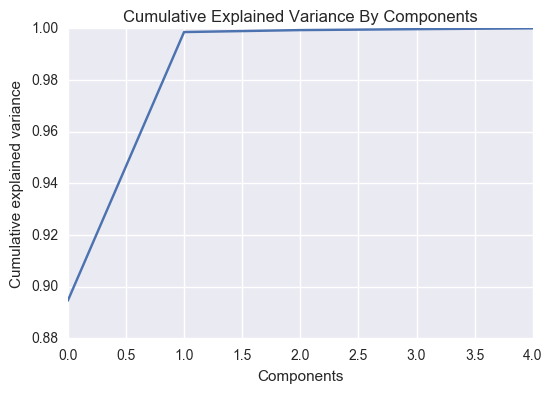

In [20]:
#PCA portion of the analysis
eigenVariant = PCA()
eigenVariant.fit(exomeTest)

plt.plot(np.cumsum(eigenVariant.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance By Components')
np.cumsum(eigenVariant.explained_variance_ratio_)

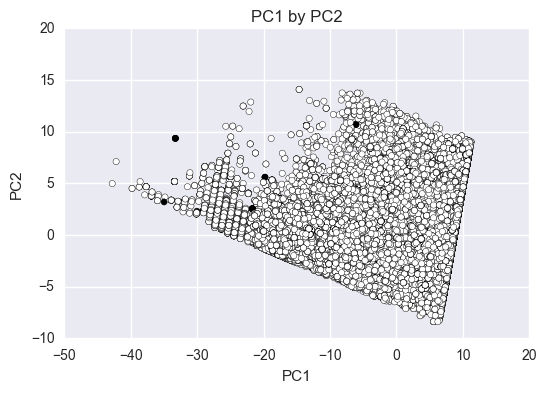

In [21]:
#PC plot colored by js_cause
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c=exome['js_cause'])
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

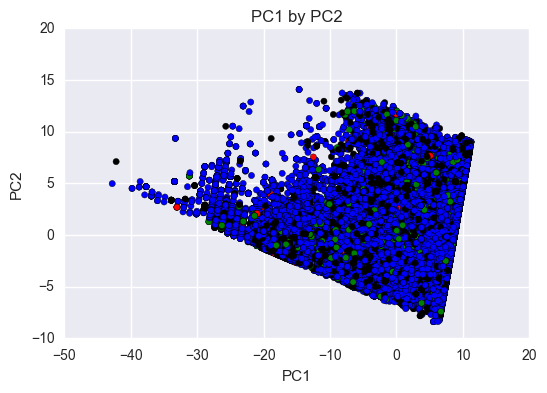

In [29]:
#PC plot colored by localization
variants_red = eigenVariant.transform(exomeTest)
exomeColor = exome['localization'].replace([0,1,2,3],['blue', 'red','green','black'])
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c= exomeColor)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

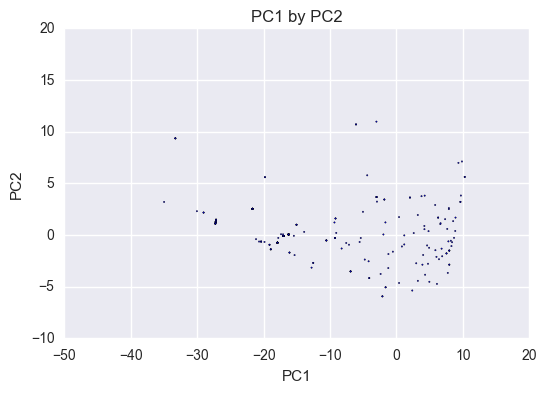

In [23]:
#PC plot with only JS causative variants
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), exome['js_cause']==1)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

[0 0 0 ..., 0 0 0]


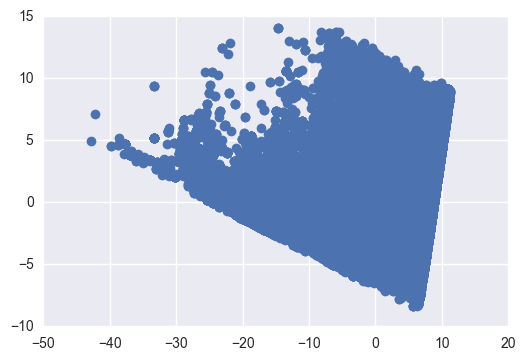

In [31]:
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['js_cause']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for JS in set(predicted):
    plt.plot(X[predicted==JS,0], X[predicted==JS,1], 'o')

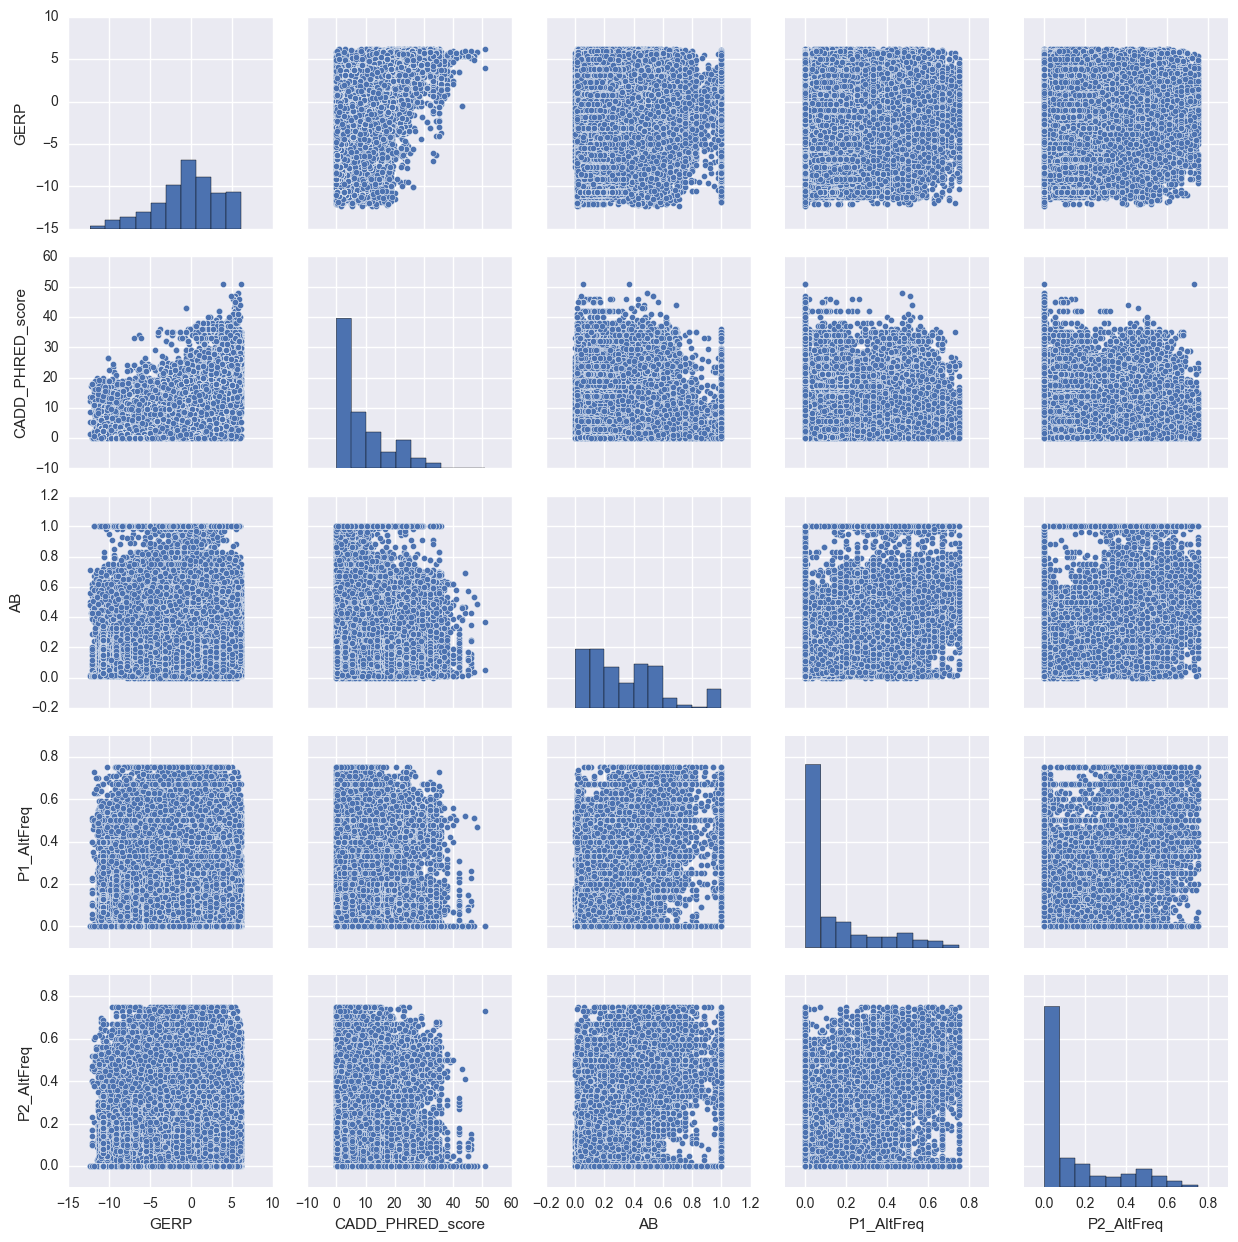

In [25]:
sns.pairplot(exomeTest)